In [2]:
## calculate descriptor

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
# the descriptor moldule has a list of the avaliable descriptors
print(len(Descriptors._descList))
print(Descriptors._descList[:3])

208
[('MaxEStateIndex', <function MaxEStateIndex at 0x118f4a170>), ('MinEStateIndex', <function MinEStateIndex at 0x118f4a200>), ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x118f4a290>)]


In [4]:
def getMolDescriptors(mol,missingVal=None):
    related_info = {}
    for nm,fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            import traceback
            traceback.print_exc()
            val = missingVal
        related_info[nm] = val
    return related_info
            
    

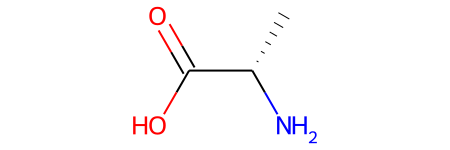

In [5]:
mol = Chem.MolFromSequence("A")
mol

In [7]:
getMolDescriptors(mol)

{'MaxEStateIndex': 9.574074074074074,
 'MinEStateIndex': -0.9629629629629626,
 'MaxAbsEStateIndex': 9.574074074074074,
 'MinAbsEStateIndex': 0.7314814814814816,
 'qed': 0.4513521877377077,
 'MolWt': 89.094,
 'HeavyAtomMolWt': 82.038,
 'ExactMolWt': 89.047678464,
 'NumValenceElectrons': 36,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.3196779563386595,
 'MinPartialCharge': -0.4800942338470611,
 'MaxAbsPartialCharge': 0.4800942338470611,
 'MinAbsPartialCharge': 0.3196779563386595,
 'FpDensityMorgan1': 2.0,
 'FpDensityMorgan2': 2.1666666666666665,
 'FpDensityMorgan3': 2.1666666666666665,
 'BCUT2D_MWHI': 16.367425029932832,
 'BCUT2D_MWLOW': 10.385340795249778,
 'BCUT2D_CHGHI': 1.9902887517857766,
 'BCUT2D_CHGLO': -1.897069452840336,
 'BCUT2D_LOGPHI': 1.676610209507763,
 'BCUT2D_LOGPLOW': -2.2500042064386885,
 'BCUT2D_MRHI': 5.718631580202884,
 'BCUT2D_MRLOW': -0.13756290275528402,
 'BalabanJ': 3.2575861612334887,
 'BertzCT': 59.813537528125096,
 'Chi0': 5.1547005383792515,
 'Chi0n': 3

## general standard
1. Lipinski Rule of 5
2. Ghose Filter
3. Veber Filter
4. Rule of 3 Filter
5. REOS Filter
6. Drug-like Filter (QED)

Lipinski:
---
    Molecular Weight <= 500
    LogP <= 5
    H-Bond Donor Count <= 5
    H-Bond Acceptor Count <= 10
Ghose:
---
    Molecular Weight between 160 and 480
    LogP between -0.4 and +5.6
    Atom count between 20 and 70
    Molar refractivity between 40 and 130
Veber:
---
    Rotatable bonds <= 10
    Topological polar surface area <= 140
REOS:
---
    Molecular Weight between 200 and 500
    LogP between -5.0 and +5.0
    H-Bond Donor Count between 0 and 5
    H-Bond Acceptor Count between 0 and 10
    Formal charge between -2 and +2
    Rotatable bonds between 0 and 8
    Heavy atom count between 15 and 50
Rule of 3:
---
    Molecular Weigh <= 300
    LogP <= 3
    H-Bond Donor Count <=3 
    H-Bond Acceptor Count <=3
    Rotatable bond count <= 3

Drug-Like (QED):
---
    Molecular Weight < 400
    ring count >0
    Rotatable bond count < 5
    H-Bond Donor Count <=5
    H-Bond Acceptor Count <=10
    LogP <5
  


In [8]:
# calulate descriptors
molecular_weight = Descriptors.ExactMolWt(mol)
logP = Descriptors.MolLogP(mol)
h_bond_donor = Descriptors.NumHDonors(mol)
h_bond_acceptor = Descriptors.NumHAcceptors(mol)
rotatable_bonds = Descriptors.NumRotatableBonds(mol)
number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(mol)
molar_refractivity = Chem.Crippen.MolMR(mol)
topological_surface_area_mapping = Chem.QED.properties(mol).PSA
formal_charge = Chem.rdmolops.GetFormalCharge(mol)
heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(mol)
num_of_rings = Chem.rdMolDescriptors.CalcNumRings(mol)

In [9]:
ala_info = {"molecular_weight":molecular_weight,
"logP":logP,
"h_bond_donor":h_bond_donor,
"h_bond_acceptor":h_bond_acceptor,
"rotatable_bonds":rotatable_bonds,
"number_of_atoms":number_of_atoms,
"molar_refractivity":molar_refractivity,
"topological_surface_area_mapping":topological_surface_area_mapping,
"formal_charge":formal_charge,
"heavy_atoms":heavy_atoms,
"num_of_rings":num_of_rings}

In [10]:
ala_info

{'molecular_weight': 89.047678464,
 'logP': -0.5817999999999999,
 'h_bond_donor': 2,
 'h_bond_acceptor': 2,
 'rotatable_bonds': 1,
 'number_of_atoms': 6,
 'molar_refractivity': 21.285199999999996,
 'topological_surface_area_mapping': 63.32000000000001,
 'formal_charge': 0,
 'heavy_atoms': 6,
 'num_of_rings': 0}

In [ ]:
# plot radar
